In [68]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [69]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [70]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [71]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [72]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [73]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [74]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [75]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [76]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [77]:
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [78]:
# Perform a query to retrieve the data and precipitation scores

# Define the date range
start_date = dt.date(2016, 8, 23)
end_date = dt.date(2017, 8, 23)

# Perform a query to retrieve data and precipitation scores between 2016-08-23 and 2017-08-23
results = session.query(measurement.date, 
                        measurement.prcp).\
                  filter(measurement.date >= start_date, measurement.date <= end_date).all()

# Print the results
for result in results:
    print(result)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [79]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_columns = [{"Date": result[0], "Precipitation": result[1]} for result in results]
pd.DataFrame(results_columns)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [80]:
# Sort the dataframe by date
df = pd.DataFrame(results_columns)
df_sorted = df.sort_values(by='Date')
df_sorted

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


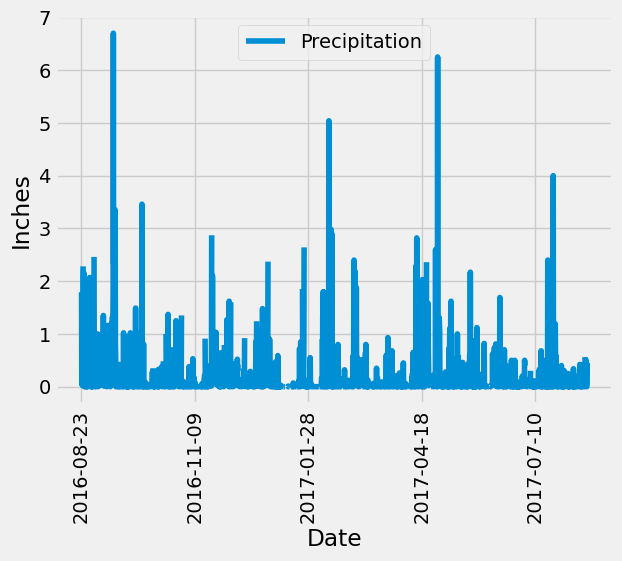

In [81]:
# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [82]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [83]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [84]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).\
                               group_by(measurement.station).\
                               order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [85]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
                filter(measurement.station == 'USC00519281').order_by(func.min(measurement.tobs)).all()
temperatures

[(54.0, 85.0, 71.66378066378067)]

In [86]:
# Using the most active station id, 
# Query the last 12 months of temperature observation data for this station 
year_temp = session.query(measurement.tobs).\
      filter(measurement.date >= year_ago, measurement.station == 'USC00519281').\
      order_by(measurement.tobs).all()

# Save the query results to a Pandas DataFrame
df_yt = pd.DataFrame(year_temp, columns=['Tobs'])
df_yt.head()

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


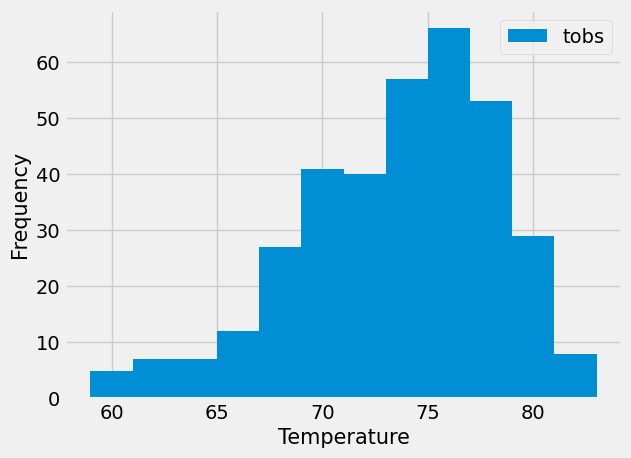

In [87]:
# Using the most active station id, 
# Plot the results as a histogram
histogram = pd.DataFrame(year_temp)
histogram.plot.hist(bins = 12)
plt.xlabel("Temperature", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
labels = ["tobs"]
plt.legend(labels)
plt.show()

# Close Session

In [88]:
# Close Session
session.close()